In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Load tide data from a CSV file
with open('data.txt', 'r') as infile:
    tide_data = infile.read().split('\n')
    
day = []
time = []
height = []

def militaryTimeToDay(time):
    hour, minute = map(int, time.split(':'))
    return hour / 24 + minute / 1440

for line in tide_data[3:]:
    line = line.lstrip(" ")
    lineData = line.split(" ")
    lineData = [x for x in lineData if x != '']
    #print(lineData)
    day.append(int(lineData[0]))
    time.append(militaryTimeToDay(lineData[1]))
    height.append(float(lineData[2]))

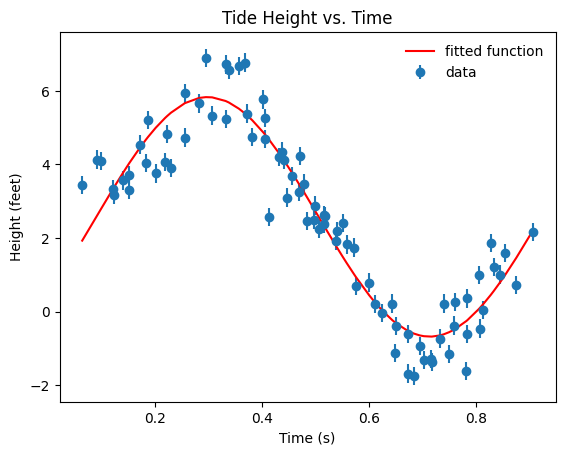

In [45]:
"""Data is no in pattern but the best fit line is a sin wave"""
#x = np.array(day) + np.array(time)
"""Data looks like a sin wave but the best fit line is crazy"""
x = np.array(time)

y = np.array(height)
y_err = np.full(len(y), 0.25)


# Define the oscillatory function
def oscfunc(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

def sinusoid(x, a, b, c):
    return a * np.sin(b * x + c)

# Fit the oscillatory function to the tide data
params, _ = curve_fit(oscfunc, x, y, sigma=y_err)

x_model = np.sort(x)
y_model = oscfunc(x_model, params[0], params[1], params[2], params[3])


plt.errorbar(x, y, y_err, fmt='o', label="data")
plt.plot(x_model, y_model, color='red' ,label="fitted function")
plt.xlabel("Time (s)")
plt.ylabel("Height (feet)")
plt.title("Tide Height vs. Time")
plt.legend(frameon=False)
plt.show()